In [2]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib as plt
from rasterio.plot import show
import pandas as pd
import georasters as gr
import geopandas as gpd
from matplotlib import pyplot as plt
import rioxarray as rio


adress = "BeCode Antwerpen, Tolhuis, Sint-Pietersvliet 7, 2000 Antwerpen"
location = gpd.tools.geocode(adress)
location.geometry


0    POINT (4.40084 51.22561)
Name: geometry, dtype: geometry

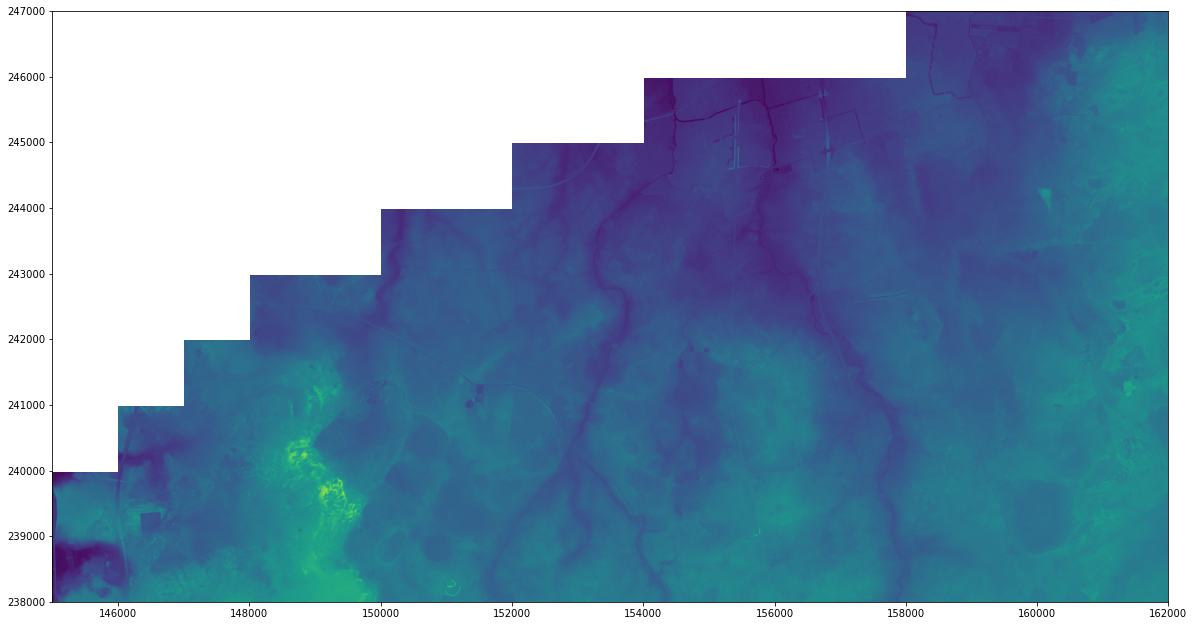

<AxesSubplot:>

In [3]:
fp_DTM = r'Data/DTM/DTM-1/GeoTIFF/DHMVIIDTMRAS1m_k01.tif'
DTM_img = rasterio.open(fp_DTM)
fig = plt.figure(figsize=(20,20))
show(DTM_img)

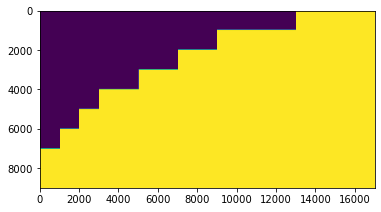

<AxesSubplot:>

In [4]:
show(DTM_img.read())

In [5]:
DTM_img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [6]:
left_0 = DTM_img.bounds[0]
bottom_1 = DTM_img.bounds[1]
right_2 = DTM_img.bounds[2]
top_3 = DTM_img.bounds[3]

In [7]:
bottom_1

238000.0

In [8]:
location.geometry

0    POINT (4.40084 51.22561)
Name: geometry, dtype: geometry

In [9]:
DTM_array = DTM_img.read()
DTM_array

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.693e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,
          1.688e+01,  1.690e+01]]], dtype=float32)

In [10]:
left = DTM_img.bounds[0]
bottom = DTM_img.bounds[1]
right = DTM_img.bounds[2]
top = DTM_img.bounds[3]

In [11]:
DTM_img.bounds


BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [12]:
# Gent
print(rasterio.transform.TransformMethodsMixin.index(DTM_img, left, top))
print(rasterio.transform.TransformMethodsMixin.index(DTM_img, left, bottom))
print(rasterio.transform.TransformMethodsMixin.index(DTM_img, right, top))
print(rasterio.transform.TransformMethodsMixin.index(DTM_img, right, bottom))

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


In [13]:
DTM_img.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}

In [14]:
DTM_img.crs

CRS.from_epsg(31370)

In [15]:
DTM_img.name

'Data/DTM/DTM-1/GeoTIFF/DHMVIIDTMRAS1m_k01.tif'

In [16]:
DTM_img.shape

(9000, 17000)

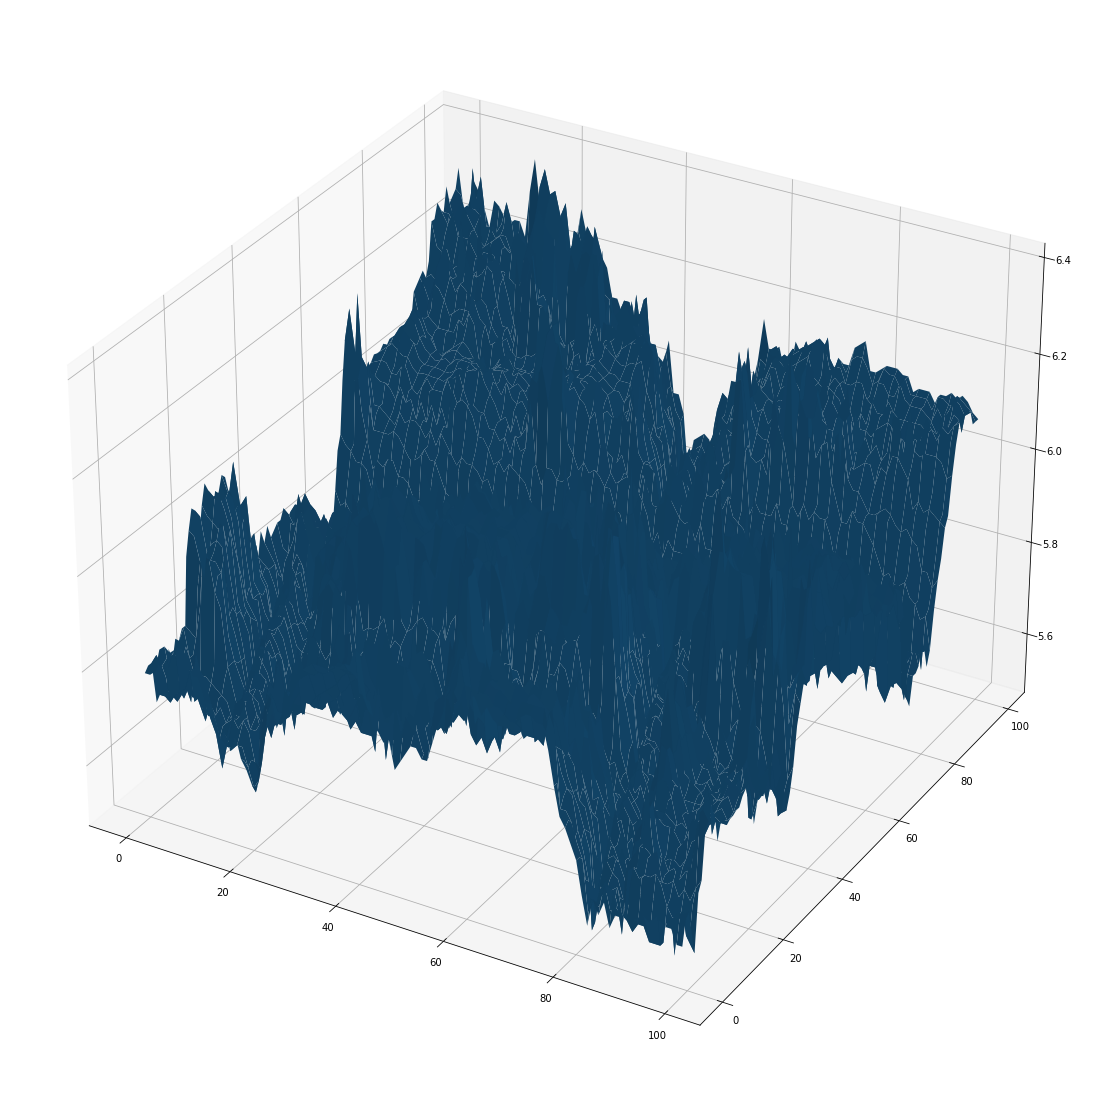

In [17]:
size = 100
rows = DTM_img.height
columns = DTM_img.width
image = DTM_img.read(1)[1000:1100,11000:11100]
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection='3d')
x = np.outer(np.arange(size),np.ones(size))
y = np.outer(np.ones(size),np.arange(size))  #Try to find another way for x & y since it isn't too efficient.
ax.plot_surface(x,y,image) 
#for x in range(10):
# for y in range(10): 
#ax.plot_surface(x,y,image[x,y]) ax.set_zlim(0,50) plt.show() print(image)

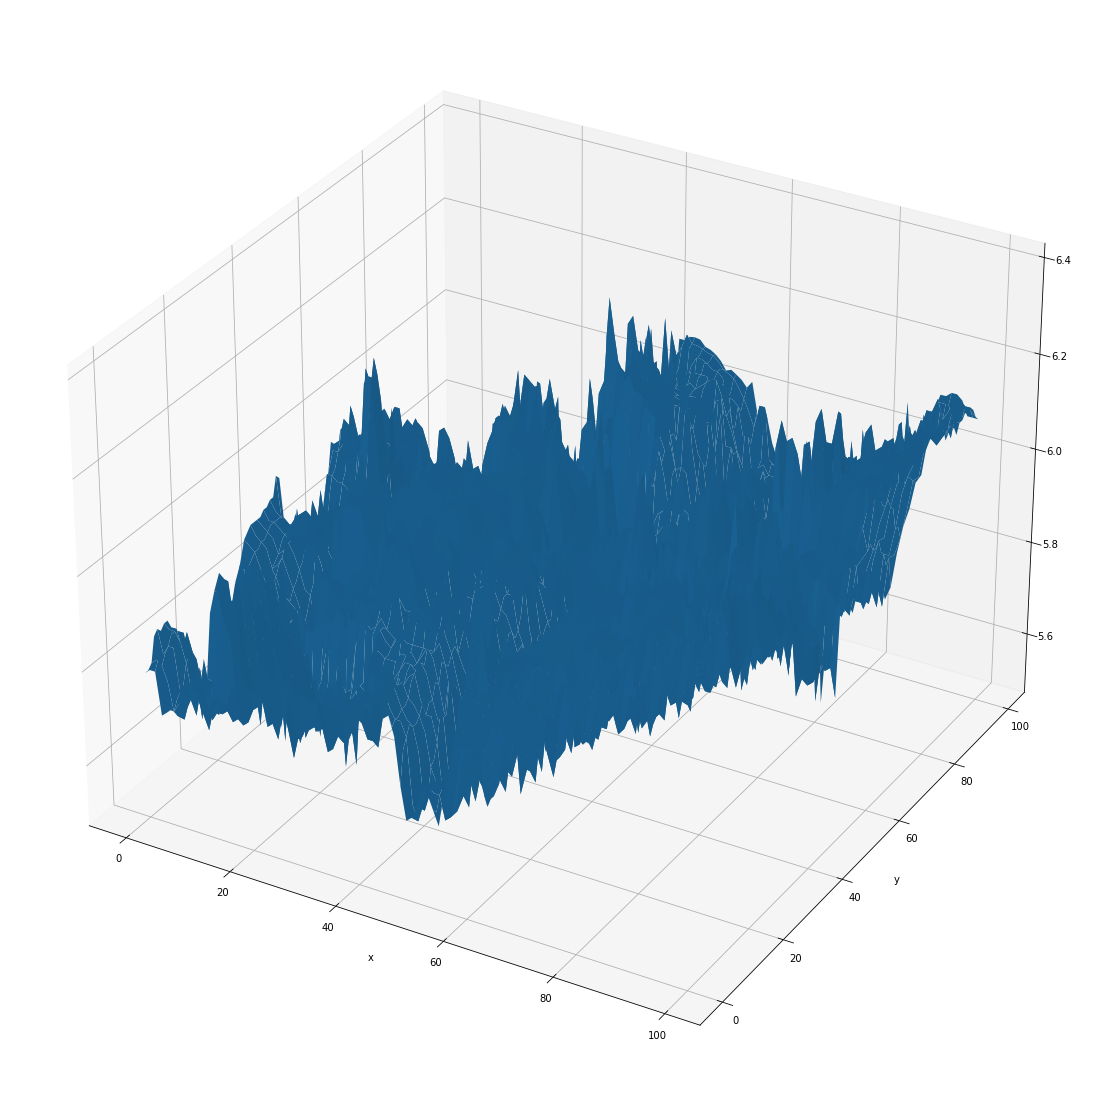

In [18]:
image = DTM_img.read(1)[1000:1100,11000:11100]
nx = image.shape[1]
ny = image.shape[0]

x = range(nx)
y = range(ny)

X,Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(20, 20))
ha = hf.add_subplot(111, projection="3d")
ha.plot_surface(X,Y, image)
ha.set_zlim = (0, 50)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
